In [1]:
#import pandas and numpy
import numpy as np
import pandas as pd

#read the train csv file and explore
df = pd.read_csv('train.csv')
df_test_2 = pd.read_csv('test.csv')
display(df.head())
display(df_test_2.head())

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [2]:
#perform EDA on the dataframe
display("shape of the dataframe is:",df.shape)
display("column names are as follows:",df.columns)
index_final = df.columns.tolist()

'shape of the dataframe is:'

(20972, 9)

'column names are as follows:'

Index(['ID', 'TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [4]:
df.describe()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
count,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000,20972.000000
mean,10486.500000,0.409784,0.286716,0.267881,0.248236,0.027990,0.011873
std,6054.239259,0.491806,0.452238,0.442866,0.432000,0.164947,0.108317
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5243.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10486.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15729.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,20972.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#get the number of research paper under each tag
#tag names
tagnames = df.drop(['ID','TITLE','ABSTRACT'],axis=1).columns.tolist()
display(tagnames)

['Computer Science',
 'Physics',
 'Mathematics',
 'Statistics',
 'Quantitative Biology',
 'Quantitative Finance']

In [6]:
tagno = {}
for name in tagnames:
    tagno.update({name:df[name].sum()})
display(tagno)

{'Computer Science': 8594,
 'Physics': 6013,
 'Mathematics': 5618,
 'Statistics': 5206,
 'Quantitative Biology': 587,
 'Quantitative Finance': 249}

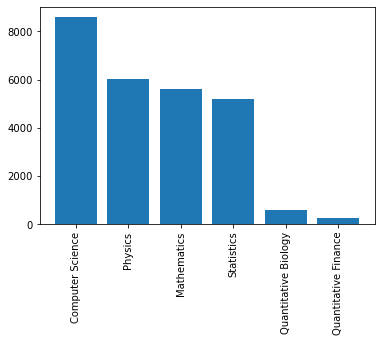

In [7]:
#import matplotlib and plot number of research paper under each tag
import matplotlib.pyplot as plt
plt.bar(range(len(tagno)),list(tagno.values()),align ='center')
plt.xticks(range(len(tagno)),list(tagno.keys()),rotation = 90)
plt.show()

'maximum tags that belong to a research paper are:'

3

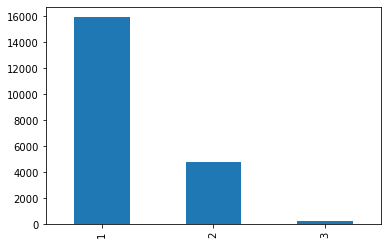

In [8]:
# find the maximum number of tags present for a research paper
df['combinations'] = df['Computer Science'] + df['Physics'] + df['Mathematics'] + df['Statistics'] + df['Quantitative Biology'] + df['Quantitative Finance']
display("maximum tags that belong to a research paper are:", df['combinations'].max())
df['combinations'].value_counts().plot(kind = 'bar')

In [9]:
# find all unique combinations of 3 tags
from itertools import combinations
comb2,comb3 = list(combinations(tagnames,2)),list(combinations(tagnames,3))
totcomb = [list(ele) for ele in comb2+comb3]
totcomb = totcomb + [[el] for el in tagnames]
display(totcomb)
display("total tag combinations that can be possibly present:", len(totcomb))

[['Computer Science', 'Physics'],
 ['Computer Science', 'Mathematics'],
 ['Computer Science', 'Statistics'],
 ['Computer Science', 'Quantitative Biology'],
 ['Computer Science', 'Quantitative Finance'],
 ['Physics', 'Mathematics'],
 ['Physics', 'Statistics'],
 ['Physics', 'Quantitative Biology'],
 ['Physics', 'Quantitative Finance'],
 ['Mathematics', 'Statistics'],
 ['Mathematics', 'Quantitative Biology'],
 ['Mathematics', 'Quantitative Finance'],
 ['Statistics', 'Quantitative Biology'],
 ['Statistics', 'Quantitative Finance'],
 ['Quantitative Biology', 'Quantitative Finance'],
 ['Computer Science', 'Physics', 'Mathematics'],
 ['Computer Science', 'Physics', 'Statistics'],
 ['Computer Science', 'Physics', 'Quantitative Biology'],
 ['Computer Science', 'Physics', 'Quantitative Finance'],
 ['Computer Science', 'Mathematics', 'Statistics'],
 ['Computer Science', 'Mathematics', 'Quantitative Biology'],
 ['Computer Science', 'Mathematics', 'Quantitative Finance'],
 ['Computer Science', 'Sta

'total tag combinations that can be possibly present:'

41

In [10]:
# find the counts of all unique combinations of tags
from collections import Counter
co = []
for index, row in df.iterrows():
    l = []
    for name in tagnames:
        if row[name] == 1:
            l.append(name)
    co.append(l)
Ot = Counter([tuple(i) for i in co])
display(Ot,"number of unique combinations",len(Ot))

Counter({('Computer Science',): 4910,
         ('Mathematics',): 3610,
         ('Computer Science', 'Statistics'): 2285,
         ('Physics',): 5120,
         ('Quantitative Biology',): 443,
         ('Statistics',): 1636,
         ('Physics', 'Mathematics'): 293,
         ('Mathematics', 'Statistics'): 825,
         ('Computer Science', 'Mathematics'): 682,
         ('Quantitative Finance',): 209,
         ('Computer Science', 'Physics'): 437,
         ('Computer Science', 'Mathematics', 'Statistics'): 179,
         ('Physics', 'Statistics'): 99,
         ('Computer Science', 'Physics', 'Statistics'): 36,
         ('Computer Science', 'Quantitative Biology'): 30,
         ('Statistics', 'Quantitative Biology'): 105,
         ('Statistics', 'Quantitative Finance'): 24,
         ('Physics', 'Mathematics', 'Statistics'): 9,
         ('Computer Science', 'Quantitative Finance'): 9,
         ('Quantitative Biology', 'Quantitative Finance'): 4,
         ('Computer Science', 'Statistics', '

'number of unique combinations'

24

In [11]:
# analysing the words in titles and abstracts
titles = []
abstracts = []
for index,row in df.iterrows():
    l = row['TITLE'].split()
    m = row['ABSTRACT'].split()
    for el in l:
        titles.append(el)
    for ele in m:
        abstracts.append(ele)
display(titles)
display(abstracts)

['Reconstructing',
 'Subject-Specific',
 'Effect',
 'Maps',
 'Rotation',
 'Invariance',
 'Neural',
 'Network',
 'Spherical',
 'polyharmonics',
 'and',
 'Poisson',
 'kernels',
 'for',
 'polyharmonic',
 'functions',
 'A',
 'finite',
 'element',
 'approximation',
 'for',
 'the',
 'stochastic',
 'Maxwell--Landau--Lifshitz--Gilbert',
 'system',
 'Comparative',
 'study',
 'of',
 'Discrete',
 'Wavelet',
 'Transforms',
 'and',
 'Wavelet',
 'Tensor',
 'Train',
 'decomposition',
 'to',
 'feature',
 'extraction',
 'of',
 'FTIR',
 'data',
 'of',
 'medicinal',
 'plants',
 'On',
 'maximizing',
 'the',
 'fundamental',
 'frequency',
 'of',
 'the',
 'complement',
 'of',
 'an',
 'obstacle',
 'On',
 'the',
 'rotation',
 'period',
 'and',
 'shape',
 'of',
 'the',
 'hyperbolic',
 'asteroid',
 '1I/`Oumuamua',
 '(2017)',
 'U1',
 'from',
 'its',
 'lightcurve',
 'Adverse',
 'effects',
 'of',
 'polymer',
 'coating',
 'on',
 'heat',
 'transport',
 'at',
 'solid-liquid',
 'interface',
 'SPH',
 'calculations',
 'o

['Predictive',
 'models',
 'allow',
 'subject-specific',
 'inference',
 'when',
 'analyzing',
 'disease',
 'related',
 'alterations',
 'in',
 'neuroimaging',
 'data.',
 'Given',
 'a',
 "subject's",
 'data,',
 'inference',
 'can',
 'be',
 'made',
 'at',
 'two',
 'levels:',
 'global,',
 'i.e.',
 'identifiying',
 'condition',
 'presence',
 'for',
 'the',
 'subject,',
 'and',
 'local,',
 'i.e.',
 'detecting',
 'condition',
 'effect',
 'on',
 'each',
 'individual',
 'measurement',
 'extracted',
 'from',
 'the',
 "subject's",
 'data.',
 'While',
 'global',
 'inference',
 'is',
 'widely',
 'used,',
 'local',
 'inference,',
 'which',
 'can',
 'be',
 'used',
 'to',
 'form',
 'subject-specific',
 'effect',
 'maps,',
 'is',
 'rarely',
 'used',
 'because',
 'existing',
 'models',
 'often',
 'yield',
 'noisy',
 'detections',
 'composed',
 'of',
 'dispersed',
 'isolated',
 'islands.',
 'In',
 'this',
 'article,',
 'we',
 'propose',
 'a',
 'reconstruction',
 'method,',
 'named',
 'RSM,',
 'to',
 'imp

In [12]:
# combine title and abstract
df['title_abstract_combined'] = df['TITLE'] + ' ' + df['ABSTRACT']
df_test_2['title_abstract_combined'] = df_test_2['TITLE'] + ' ' + df_test_2['ABSTRACT']
display(df.head())
display(df_test_2.head())

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,combinations,title_abstract_combined
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1,Reconstructing Subject-Specific Effect Maps ...
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1,Rotation Invariance Neural Network Rotation ...
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,1,Spherical polyharmonics and Poisson kernels fo...
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,1,A finite element approximation for the stochas...
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,2,Comparative study of Discrete Wavelet Transfor...


,ID,TITLE,ABSTRACT,title_abstract_combined
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,Closed-form Marginal Likelihood in Gamma-Poiss...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,Laboratory mid-IR spectra of equilibrated and ...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,Case For Static AMSDU Aggregation in WLANs F...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,The $Gaia$-ESO Survey: the inner disk intermed...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,Witness-Functions versus Interpretation-Functi...


In [13]:
# remove ID, TITLE, ABSTRACT, combinations, title_processed, and abstract_processed columns
df = df.drop(labels = ['ID','TITLE','ABSTRACT','combinations'], axis = 1)
display(df.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...
3,0,0,1,0,0,0,A finite element approximation for the stochas...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...


In [14]:
df_test_2 = df_test_2.drop(labels = ['ID','TITLE','ABSTRACT'], axis = 1)
display(df_test_2.head())

,title_abstract_combined
0,Closed-form Marginal Likelihood in Gamma-Poiss...
1,Laboratory mid-IR spectra of equilibrated and ...
2,Case For Static AMSDU Aggregation in WLANs F...
3,The $Gaia$-ESO Survey: the inner disk intermed...
4,Witness-Functions versus Interpretation-Functi...


In [15]:
# load the regular expressions library
import re

#remove punctuation from title and abstract
df['title_abstract_combined_processed'] = df['title_abstract_combined'].map(lambda x: re.sub('[,\.!?0-9]', ' ',x))
df_test_2['title_abstract_combined_processed'] = df_test_2['title_abstract_combined'].map(lambda x: re.sub('[,\.!?0-9]', ' ',x))

df['title_abstract_combined_processed'] = df['title_abstract_combined_processed'].map(lambda x: re.sub('[\W_]+', ' ',x))
df_test_2['title_abstract_combined_processed'] = df_test_2['title_abstract_combined_processed'].map(lambda x: re.sub('[\W_]+', ' ',x))

#convert the title and abstract to lowercase
df['title_abstract_combined_processed'] = df['title_abstract_combined_processed'].map(lambda x: x.lower())
df_test_2['title_abstract_combined_processed'] = df_test_2['title_abstract_combined_processed'].map(lambda x: x.lower())
display(df.head())
display(df_test_2.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,title_abstract_combined_processed
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstructing subject specific effect maps pr...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotation invariance neural network rotation in...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spherical polyharmonics and poisson kernels fo...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,a finite element approximation for the stochas...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,comparative study of discrete wavelet transfor...


,title_abstract_combined,title_abstract_combined_processed
0,Closed-form Marginal Likelihood in Gamma-Poiss...,closed form marginal likelihood in gamma poiss...
1,Laboratory mid-IR spectra of equilibrated and ...,laboratory mid ir spectra of equilibrated and ...
2,Case For Static AMSDU Aggregation in WLANs F...,case for static amsdu aggregation in wlans fra...
3,The $Gaia$-ESO Survey: the inner disk intermed...,the gaia eso survey the inner disk intermediat...
4,Witness-Functions versus Interpretation-Functi...,witness functions versus interpretation functi...


In [16]:
# analysing the words in titles and abstracts
titles_pr = []
abstracts_pr = []
for index,row in df.iterrows():
    l = row['title_abstract_combined_processed'].split()
    m = row['title_abstract_combined_processed'].split()
    for el in l:
        titles_pr.append(el)
    for ele in m:
        abstracts_pr.append(ele)
display(titles_pr)
display(abstracts_pr)

['reconstructing',
 'subject',
 'specific',
 'effect',
 'maps',
 'predictive',
 'models',
 'allow',
 'subject',
 'specific',
 'inference',
 'when',
 'analyzing',
 'disease',
 'related',
 'alterations',
 'in',
 'neuroimaging',
 'data',
 'given',
 'a',
 'subject',
 's',
 'data',
 'inference',
 'can',
 'be',
 'made',
 'at',
 'two',
 'levels',
 'global',
 'i',
 'e',
 'identifiying',
 'condition',
 'presence',
 'for',
 'the',
 'subject',
 'and',
 'local',
 'i',
 'e',
 'detecting',
 'condition',
 'effect',
 'on',
 'each',
 'individual',
 'measurement',
 'extracted',
 'from',
 'the',
 'subject',
 's',
 'data',
 'while',
 'global',
 'inference',
 'is',
 'widely',
 'used',
 'local',
 'inference',
 'which',
 'can',
 'be',
 'used',
 'to',
 'form',
 'subject',
 'specific',
 'effect',
 'maps',
 'is',
 'rarely',
 'used',
 'because',
 'existing',
 'models',
 'often',
 'yield',
 'noisy',
 'detections',
 'composed',
 'of',
 'dispersed',
 'isolated',
 'islands',
 'in',
 'this',
 'article',
 'we',
 'prop

['reconstructing',
 'subject',
 'specific',
 'effect',
 'maps',
 'predictive',
 'models',
 'allow',
 'subject',
 'specific',
 'inference',
 'when',
 'analyzing',
 'disease',
 'related',
 'alterations',
 'in',
 'neuroimaging',
 'data',
 'given',
 'a',
 'subject',
 's',
 'data',
 'inference',
 'can',
 'be',
 'made',
 'at',
 'two',
 'levels',
 'global',
 'i',
 'e',
 'identifiying',
 'condition',
 'presence',
 'for',
 'the',
 'subject',
 'and',
 'local',
 'i',
 'e',
 'detecting',
 'condition',
 'effect',
 'on',
 'each',
 'individual',
 'measurement',
 'extracted',
 'from',
 'the',
 'subject',
 's',
 'data',
 'while',
 'global',
 'inference',
 'is',
 'widely',
 'used',
 'local',
 'inference',
 'which',
 'can',
 'be',
 'used',
 'to',
 'form',
 'subject',
 'specific',
 'effect',
 'maps',
 'is',
 'rarely',
 'used',
 'because',
 'existing',
 'models',
 'often',
 'yield',
 'noisy',
 'detections',
 'composed',
 'of',
 'dispersed',
 'isolated',
 'islands',
 'in',
 'this',
 'article',
 'we',
 'prop

In [17]:
#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

#remove stop_words
stop_words = set(stopwords.words('english'))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub("",sentence)
df['title_abstract_combined_processed']=df['title_abstract_combined_processed'].apply(removeStopWords)
df_test_2['title_abstract_combined_processed']=df_test_2['title_abstract_combined_processed'].apply(removeStopWords)
display(df.head())
display(df_test_2.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,title_abstract_combined_processed
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstructing subject specific effect maps pr...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotation invariance neural network rotation in...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spherical polyharmonics poisson kernels polyha...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,finite element approximation stochastic maxwel...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,comparative study discrete wavelet transforms ...


,title_abstract_combined,title_abstract_combined_processed
0,Closed-form Marginal Likelihood in Gamma-Poiss...,closed form marginal likelihood gamma poisson ...
1,Laboratory mid-IR spectra of equilibrated and ...,laboratory mid ir spectra equilibrated igneous...
2,Case For Static AMSDU Aggregation in WLANs F...,case static amsdu aggregation wlans frame aggr...
3,The $Gaia$-ESO Survey: the inner disk intermed...,gaia eso survey inner disk intermediate age op...
4,Witness-Functions versus Interpretation-Functi...,witness functions versus interpretation functi...


In [18]:
#do stemming on title and abstract
stemmer=SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['title_abstract_combined_processed']=df['title_abstract_combined_processed'].apply(stemming)
df_test_2['title_abstract_combined_processed']=df_test_2['title_abstract_combined_processed'].apply(stemming)
display(df.head())
display(df_test_2.head())

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,title_abstract_combined,title_abstract_combined_processed
0,1,0,0,0,0,0,Reconstructing Subject-Specific Effect Maps ...,reconstruct subject specif effect map predict ...
1,1,0,0,0,0,0,Rotation Invariance Neural Network Rotation ...,rotat invari neural network rotat invari trans...
2,0,0,1,0,0,0,Spherical polyharmonics and Poisson kernels fo...,spheric polyharmon poisson kernel polyharmon f...
3,0,0,1,0,0,0,A finite element approximation for the stochas...,finit element approxim stochast maxwel landau ...
4,1,0,0,1,0,0,Comparative study of Discrete Wavelet Transfor...,compar studi discret wavelet transform wavelet...


,title_abstract_combined,title_abstract_combined_processed
0,Closed-form Marginal Likelihood in Gamma-Poiss...,close form margin likelihood gamma poisson mat...
1,Laboratory mid-IR spectra of equilibrated and ...,laboratori mid ir spectra equilibr igneous met...
2,Case For Static AMSDU Aggregation in WLANs F...,case static amsdu aggreg wlan frame aggreg mec...
3,The $Gaia$-ESO Survey: the inner disk intermed...,gaia eso survey inner disk intermedi age open ...
4,Witness-Functions versus Interpretation-Functi...,wit function versus interpret function secreci...


In [19]:
#pip install keras
#import sys
#!{sys.executable} -m pip install spacy
#import sys
#!{sys.executable} -m pip install logging

In [20]:
import gensim
from gensim.models import Word2Vec
from time import time
from collections import defaultdict
import spacy
import logging
logging.basicConfig(format = "%(levelname)s - %(asctime)s: %(message)s", datefmt = '%H:%M:%S', level = logging.INFO)

In [21]:
from gensim.models.phrases import Phrases, Phraser
sent = [row.split() for row in df['title_abstract_combined_processed']]
sent_test_2 = [row.split() for row in df_test_2['title_abstract_combined_processed']]
phrases = Phrases(sent, min_count = 50, progress_per = 10000)
phrases_test_2 = Phrases(sent_test_2, min_count = 50, progress_per = 10000)

INFO - 12:18:43: collecting all words and their counts
INFO - 12:18:43: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 12:18:45: PROGRESS: at sentence #10000, processed 1020749 words and 570778 word types
INFO - 12:18:47: PROGRESS: at sentence #20000, processed 2035896 words and 962748 word types
INFO - 12:18:48: collected 996639 word types from a corpus of 2134263 words (unigram + bigrams) and 20972 sentences
INFO - 12:18:48: using 996639 counts as vocab in Phrases<0 vocab, min_count=50, threshold=10.0, max_vocab_size=40000000>
INFO - 12:18:48: collecting all words and their counts
INFO - 12:18:48: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 12:18:50: collected 523371 word types from a corpus of 915660 words (unigram + bigrams) and 8989 sentences
INFO - 12:18:50: using 523371 counts as vocab in Phrases<0 vocab, min_count=50, threshold=10.0, max_vocab_size=40000000>


In [22]:
bigram = Phraser(phrases)
sentences = bigram[sent]
bigram_test_2 = Phraser(phrases_test_2)
sentences_test_2 = bigram[sent_test_2]

INFO - 12:18:50: source_vocab length 996639
INFO - 12:19:02: Phraser built with 480 phrasegrams
INFO - 12:19:02: source_vocab length 523371
INFO - 12:19:08: Phraser built with 166 phrasegrams


In [23]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

36007

In [24]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['model',
 'use',
 'method',
 'data',
 'result',
 'system',
 'base',
 'show',
 'network',
 'problem']

In [25]:
word_freq = defaultdict(int)
for sent in sentences_test_2:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

23180

In [26]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['model',
 'use',
 'method',
 'data',
 'system',
 'result',
 'base',
 'network',
 'show',
 'algorithm']

In [27]:
import multiprocessing
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
display(cores)

8

In [28]:
w2v_model = Word2Vec(min_count = 5, window = 2, size = 500, sample = 6e-5, alpha = 0.05, min_alpha = 0.00001, negative = 5, workers = cores-4)

In [29]:
t = time()
w2v_model.build_vocab(sentences, progress_per = 10000)
print('Time to build vocab: {} mins'.format(round((time()-t)/60,2)))

INFO - 12:19:18: collecting all words and their counts
INFO - 12:19:18: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 12:19:21: PROGRESS: at sentence #10000, processed 983758 words, keeping 24853 word types
INFO - 12:19:24: PROGRESS: at sentence #20000, processed 1962056 words, keeping 35161 word types
INFO - 12:19:24: collected 36007 word types from a corpus of 2056851 raw words and 20972 sentences
INFO - 12:19:24: Loading a fresh vocabulary
INFO - 12:19:24: effective_min_count=5 retains 13262 unique words (36% of original 36007, drops 22745)
INFO - 12:19:24: effective_min_count=5 leaves 2016739 word corpus (98% of original 2056851, drops 40112)
INFO - 12:19:24: deleting the raw counts dictionary of 36007 items
INFO - 12:19:24: sample=6e-05 downsamples 1245 most-common words
INFO - 12:19:24: downsampling leaves estimated 1063097 word corpus (52.7% of prior 2016739)
INFO - 12:19:24: estimated required memory for 13262 words and 500 dimensions: 59679000 bytes


Time to build vocab: 0.15 mins


In [30]:
t = time()
w2v_model.train(sentences, total_examples = w2v_model.corpus_count, epochs = 30, report_delay = 1)
print('Time to build vocab: {} mins'.format(round((time()-t)/60,2)))

INFO - 12:19:27: training model with 4 workers on 13262 vocabulary and 500 features, using sg=0 hs=0 sample=6e-05 negative=5 window=2
INFO - 12:19:28: EPOCH 1 - PROGRESS: at 13.09% examples, 136664 words/s, in_qsize 0, out_qsize 0
INFO - 12:19:29: EPOCH 1 - PROGRESS: at 28.01% examples, 144107 words/s, in_qsize 0, out_qsize 0
INFO - 12:19:30: EPOCH 1 - PROGRESS: at 43.89% examples, 151453 words/s, in_qsize 0, out_qsize 0
INFO - 12:19:31: EPOCH 1 - PROGRESS: at 59.68% examples, 154442 words/s, in_qsize 0, out_qsize 0
INFO - 12:19:32: EPOCH 1 - PROGRESS: at 75.73% examples, 156428 words/s, in_qsize 0, out_qsize 0
INFO - 12:19:33: EPOCH 1 - PROGRESS: at 92.32% examples, 158149 words/s, in_qsize 0, out_qsize 0
INFO - 12:19:33: worker thread finished; awaiting finish of 3 more threads
INFO - 12:19:33: worker thread finished; awaiting finish of 2 more threads
INFO - 12:19:33: worker thread finished; awaiting finish of 1 more threads
INFO - 12:19:33: worker thread finished; awaiting finish of

INFO - 12:20:24: worker thread finished; awaiting finish of 0 more threads
INFO - 12:20:24: EPOCH - 8 : training on 2056851 raw words (1062504 effective words) took 8.0s, 133060 effective words/s
INFO - 12:20:25: EPOCH 9 - PROGRESS: at 11.16% examples, 114810 words/s, in_qsize 0, out_qsize 0
INFO - 12:20:26: EPOCH 9 - PROGRESS: at 19.79% examples, 100827 words/s, in_qsize 0, out_qsize 0
INFO - 12:20:27: EPOCH 9 - PROGRESS: at 30.42% examples, 103621 words/s, in_qsize 0, out_qsize 0
INFO - 12:20:28: EPOCH 9 - PROGRESS: at 43.43% examples, 111779 words/s, in_qsize 1, out_qsize 0
INFO - 12:20:29: EPOCH 9 - PROGRESS: at 54.39% examples, 112731 words/s, in_qsize 0, out_qsize 0
INFO - 12:20:30: EPOCH 9 - PROGRESS: at 65.55% examples, 113226 words/s, in_qsize 0, out_qsize 0
INFO - 12:20:31: EPOCH 9 - PROGRESS: at 77.15% examples, 114298 words/s, in_qsize 1, out_qsize 0
INFO - 12:20:32: EPOCH 9 - PROGRESS: at 88.36% examples, 114662 words/s, in_qsize 0, out_qsize 0
INFO - 12:20:33: worker thre

INFO - 12:21:21: worker thread finished; awaiting finish of 3 more threads
INFO - 12:21:21: worker thread finished; awaiting finish of 2 more threads
INFO - 12:21:21: worker thread finished; awaiting finish of 1 more threads
INFO - 12:21:21: worker thread finished; awaiting finish of 0 more threads
INFO - 12:21:21: EPOCH - 16 : training on 2056851 raw words (1063293 effective words) took 6.7s, 159315 effective words/s
INFO - 12:21:22: EPOCH 17 - PROGRESS: at 15.01% examples, 158820 words/s, in_qsize 0, out_qsize 0
INFO - 12:21:23: EPOCH 17 - PROGRESS: at 29.42% examples, 154617 words/s, in_qsize 1, out_qsize 0
INFO - 12:21:24: EPOCH 17 - PROGRESS: at 44.37% examples, 154059 words/s, in_qsize 0, out_qsize 0
INFO - 12:21:25: EPOCH 17 - PROGRESS: at 60.17% examples, 157506 words/s, in_qsize 1, out_qsize 0
INFO - 12:21:26: EPOCH 17 - PROGRESS: at 76.21% examples, 159826 words/s, in_qsize 1, out_qsize 0
INFO - 12:21:27: EPOCH 17 - PROGRESS: at 92.32% examples, 160994 words/s, in_qsize 0, ou

INFO - 12:22:13: worker thread finished; awaiting finish of 1 more threads
INFO - 12:22:13: worker thread finished; awaiting finish of 0 more threads
INFO - 12:22:13: EPOCH - 24 : training on 2056851 raw words (1063587 effective words) took 7.0s, 151432 effective words/s
INFO - 12:22:14: EPOCH 25 - PROGRESS: at 14.05% examples, 142313 words/s, in_qsize 0, out_qsize 0
INFO - 12:22:15: EPOCH 25 - PROGRESS: at 27.55% examples, 141331 words/s, in_qsize 0, out_qsize 0
INFO - 12:22:16: EPOCH 25 - PROGRESS: at 42.95% examples, 148513 words/s, in_qsize 0, out_qsize 0
INFO - 12:22:17: EPOCH 25 - PROGRESS: at 56.30% examples, 146193 words/s, in_qsize 0, out_qsize 0
INFO - 12:22:18: EPOCH 25 - PROGRESS: at 69.44% examples, 144302 words/s, in_qsize 0, out_qsize 0
INFO - 12:22:19: EPOCH 25 - PROGRESS: at 82.92% examples, 143869 words/s, in_qsize 0, out_qsize 0
INFO - 12:22:20: EPOCH 25 - PROGRESS: at 97.58% examples, 145131 words/s, in_qsize 1, out_qsize 0
INFO - 12:22:21: worker thread finished; a

Time to build vocab: 3.55 mins


In [31]:
w2v_model.init_sims(replace=True)

INFO - 12:22:59: precomputing L2-norms of word weight vectors


In [32]:
word_vectors = w2v_model.wv
word_vectors.vocab

{'reconstruct': <gensim.models.keyedvectors.Vocab at 0x1e451850a00>,
 'subject': <gensim.models.keyedvectors.Vocab at 0x1e451850100>,
 'specif': <gensim.models.keyedvectors.Vocab at 0x1e451850be0>,
 'effect': <gensim.models.keyedvectors.Vocab at 0x1e451850b80>,
 'map': <gensim.models.keyedvectors.Vocab at 0x1e451850940>,
 'predict': <gensim.models.keyedvectors.Vocab at 0x1e4518501f0>,
 'model': <gensim.models.keyedvectors.Vocab at 0x1e451850c40>,
 'allow': <gensim.models.keyedvectors.Vocab at 0x1e451850ac0>,
 'infer': <gensim.models.keyedvectors.Vocab at 0x1e451850bb0>,
 'analyz': <gensim.models.keyedvectors.Vocab at 0x1e451850eb0>,
 'diseas': <gensim.models.keyedvectors.Vocab at 0x1e451850f70>,
 'relat': <gensim.models.keyedvectors.Vocab at 0x1e451850d00>,
 'alter': <gensim.models.keyedvectors.Vocab at 0x1e4518509d0>,
 'neuroimag': <gensim.models.keyedvectors.Vocab at 0x1e451850ca0>,
 'data': <gensim.models.keyedvectors.Vocab at 0x1e451850af0>,
 'given': <gensim.models.keyedvectors.Vo

In [33]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)
    
    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        return np.zeros(wv.vector_size,)
    
    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv,text_list):
    return np.vstack([word_averaging(wv,post) for post in text_list])

In [34]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [35]:
#nltk.download('punkt')

In [37]:
# Split the train and test dataset
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain, ytest = train_test_split(df['title_abstract_combined_processed'],df['Computer Science'], random_state = 42, test_size = 0.25, shuffle = True)

train_tokenized = xtrain.apply(lambda r: w2v_tokenize_text(r)).values
test_tokenized = xtest.apply(lambda r: w2v_tokenize_text(r)).values

xtrain_wa = word_averaging_list(word_vectors,train_tokenized)
xtest_wa = word_averaging_list(word_vectors,test_tokenized)

print(xtrain_wa.shape)
print(xtest_wa.shape)

<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(15729, 500)
(5243, 500)


In [38]:
#print(xtrain_wa.shape[1])
xtrain_wa_df = pd.DataFrame(xtrain_wa)
display(xtrain_wa_df)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.076982,0.069054,-0.029654,0.026056,-0.076281,0.003555,0.019916,0.019743,0.030828,0.014015,...,0.028971,0.070166,-0.032698,0.019706,-0.020788,0.007350,0.017585,0.062179,0.020531,0.072708
1,0.036678,-0.046048,-0.002815,-0.037885,-0.068991,0.078726,-0.017413,-0.109934,-0.074655,0.001627,...,0.068004,-0.082366,-0.025308,0.037298,0.048669,0.017406,-0.031419,0.040512,0.040823,0.045383
2,-0.033572,0.028412,0.015697,-0.026652,-0.048973,-0.010805,0.014902,-0.068217,-0.071679,0.011698,...,0.073555,-0.108226,0.004360,0.059188,0.047605,0.054024,0.002188,0.024458,0.040258,0.075550
3,-0.001206,0.047867,-0.054095,0.037268,0.003273,0.063572,-0.013569,-0.060570,-0.029029,0.005592,...,0.011050,-0.000089,0.011680,0.069249,-0.094754,0.004428,0.030645,0.021707,0.049944,0.127019
4,0.001434,0.022460,-0.045990,0.028081,0.024657,0.035977,0.016699,-0.030228,-0.063090,-0.033497,...,0.018122,-0.029834,0.022519,-0.020616,0.015516,-0.043624,0.010401,-0.001855,0.041945,0.109113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,0.044339,-0.008919,-0.040811,0.020055,-0.012937,0.037787,-0.013710,-0.052948,-0.096228,-0.045486,...,0.059137,-0.055566,-0.056776,0.040894,0.104125,0.031970,0.038462,0.012043,0.022748,0.092298
15725,-0.000120,0.007455,-0.019752,-0.028846,-0.066395,-0.012925,-0.052968,-0.018518,0.038318,-0.014678,...,-0.024478,0.017860,0.015279,-0.035012,-0.065758,0.064979,-0.037715,0.042398,0.002986,0.042847
15726,0.037458,0.042217,-0.061365,-0.026129,-0.011420,0.037723,-0.003341,-0.024820,0.030579,0.025868,...,-0.031816,0.047056,0.020089,-0.010521,0.022420,-0.032029,-0.041141,-0.029779,-0.015397,-0.024080
15727,0.004133,0.051950,-0.032554,0.009389,-0.036589,0.068667,0.062068,-0.038919,0.012592,0.007189,...,0.018673,-0.030344,-0.016484,0.010338,0.042939,0.072371,0.063499,0.030363,0.022902,0.035775


In [46]:
#pip install keras
#import sys
#!{sys.executable} -m pip install keras

In [47]:
#pip install tensorflow
#import sys
#!{sys.executable} -m pip install tensorflow

In [39]:
# importing sigmoid function from keras backend and using it
from keras.backend import sigmoid
def swish(x,beta = 1):
    return (x*sigmoid(beta*x))

In [40]:
# getting the custom object and updating them
from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation
get_custom_objects().update({'swish': Activation(swish)})

In [43]:
# using SVM
from numpy.random import seed
seed(1)
import sklearn as sk
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_cols = xtrain_wa_df.shape[1]
n_rows = xtrain_wa_df.shape[0]

def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(100,activation = 'swish',input_dim = n_cols))
    model.add(Dropout(0.3, noise_shape = None))
    model.add(Dense(50, activation = 'swish'))
    model.add(Dropout(0.2, noise_shape = None))
    model.add(Dense(1,activation = 'sigmoid'))
    # compile model
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

# evaluate model
estimator = KerasClassifier(build_fn = create_baseline, epochs = 15, batch_size = 5, verbose = 0)
kfold = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(estimator, xtrain_wa_df, ytrain, cv = kfold)
print(results)
print("Baseline: %.8f%%  (%.8f%%)" % (results.mean()*100,results.std()*100))

[0.86395425 0.86554354 0.87380803 0.86363637 0.86518282]
Baseline: 86.64250016%  (0.37605882%)


In [44]:
# predicting on first dataset
estimator = KerasClassifier(build_fn = create_baseline, epochs = 15, batch_size = 5, verbose = 0)
estimator.fit(xtrain_wa,ytrain)
y_pred = estimator.predict(xtest_wa)
display(y_pred)

WARNING - 12:46:06: From C:\Users\ujjwal\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\wrappers\scikit_learn.py:241: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [45]:
# evaluating f1-score
from sklearn.metrics import f1_score,accuracy_score
print("accuracy_score:", accuracy_score(ytest,y_pred))
print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
print(classification_report(ytest,y_pred))

accuracy_score: 0.864390616059508
f1_score: 0.864390616059508
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3127
           1       0.79      0.90      0.84      2116

    accuracy                           0.86      5243
   macro avg       0.86      0.87      0.86      5243
weighted avg       0.87      0.86      0.87      5243



In [46]:
# testing on the final test set
x_test_2 = df_test_2['title_abstract_combined_processed']
test_2_tokenized = x_test_2.apply(lambda r: w2v_tokenize_text(r)).values

xtest_2_wa = word_averaging_list(word_vectors,test_2_tokenized)

print(xtest_2_wa.shape)
y_pred_2 = estimator.predict(xtest_2_wa)
display(y_pred_2)

<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


(8989, 500)


array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]], dtype=int64)

In [47]:
# adding the results in the final dataframe
df_test_fs = pd.read_csv('test.csv')
df_test_fs = df_test_fs.drop(labels = ['TITLE','ABSTRACT'],axis = 1)
y_pred_list = np.array(y_pred_2).tolist()
df_pred = pd.DataFrame(y_pred_list)
df_test_fs['Computer Science'] = df_pred
display(df_test_fs)
#df_test_fs.to_csv('submission_u_1.csv', index = False)

,ID,Computer Science
0,20973,0
1,20974,0
2,20975,1
3,20976,0
4,20977,1
...,...,...
8984,29957,1
8985,29958,1
8986,29959,1
8987,29960,0


In [48]:
# Looping through other labels
for i in range(len(tagnames)-1):
    xtrain , xtest , ytrain, ytest = train_test_split(df['title_abstract_combined_processed'],df[tagnames[i+1]], random_state = 42, test_size = 0.25, shuffle = True)
    
    train_tokenized = xtrain.apply(lambda r: w2v_tokenize_text(r)).values
    test_tokenized = xtest.apply(lambda r: w2v_tokenize_text(r)).values
    
    xtrain_wa = word_averaging_list(word_vectors,train_tokenized)
    xtest_wa = word_averaging_list(word_vectors,test_tokenized)
    # evaluate model
    estimator = KerasClassifier(build_fn = create_baseline, epochs = 15, batch_size = 5, verbose = 0)
    kfold = StratifiedKFold(n_splits = 5, shuffle = True)
    results = cross_val_score(estimator, xtrain_wa_df, ytrain, cv = kfold)
    print(results)
    print("Baseline: %.8f%%  (%.8f%%)" % (results.mean()*100,results.std()*100))

<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.92943418 0.93102354 0.93706292 0.93769866 0.93322736]
Baseline: 93.36893320%  (0.32521381%)


<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.89796567 0.90178001 0.90527654 0.91068023 0.89252782]
Baseline: 90.16460538%  (0.61887351%)


<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.87762237 0.88811189 0.88970119 0.87984741 0.88712239]
Baseline: 88.44810486%  (0.48150122%)


<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.974253   0.97520661 0.97202796 0.974253   0.97392684]
Baseline: 97.39334822%  (0.10446161%)


<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


[0.99078196 0.98823905 0.99078196 0.98792118 0.99014306]
Baseline: 98.95734429%  (0.12454789%)


In [49]:
# Looping through other labels
for i in range(len(tagnames)-1):
    # Split the train and test dataset
    xtrain , xtest , ytrain, ytest = train_test_split(df['title_abstract_combined_processed'],df[tagnames[i+1]], random_state = 42, test_size = 0.25, shuffle = True)
    
    train_tokenized = xtrain.apply(lambda r: w2v_tokenize_text(r)).values
    test_tokenized = xtest.apply(lambda r: w2v_tokenize_text(r)).values
    
    xtrain_wa = word_averaging_list(word_vectors,train_tokenized)
    xtest_wa = word_averaging_list(word_vectors,test_tokenized)
    
    # predicting on first dataset
    estimator = KerasClassifier(build_fn = create_baseline, epochs = 15, batch_size = 5, verbose = 0)
    estimator.fit(xtrain_wa,ytrain)
    y_pred = estimator.predict(xtest_wa)
    print("accuracy_score:", accuracy_score(ytest,y_pred))
    print("f1_score:", f1_score(ytest,y_pred,average = 'micro'))
    print(classification_report(ytest,y_pred))
    
    x_test_2 = df_test_2['title_abstract_combined_processed']
    test_2_tokenized = x_test_2.apply(lambda r: w2v_tokenize_text(r)).values
    xtest_2_wa = word_averaging_list(word_vectors,test_2_tokenized)
    print(xtest_2_wa.shape)
    y_pred_2 = estimator.predict(xtest_2_wa)
    
    y_pred_list = np.array(y_pred_2).tolist()
    df_pred = pd.DataFrame(y_pred_list)
    df_test_fs[tagnames[i+1]] = df_pred
display(df_test_fs)

<ipython-input-33-3f574c329e4d>:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  mean.append(wv.syn0norm[wv.vocab[word].index])


accuracy_score: 0.9273316803356857
f1_score: 0.9273316803356857
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3716
           1       0.90      0.84      0.87      1527

    accuracy                           0.93      5243
   macro avg       0.92      0.90      0.91      5243
weighted avg       0.93      0.93      0.93      5243

(8989, 500)
accuracy_score: 0.8989128361625024
f1_score: 0.8989128361625024
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3815
           1       0.85      0.77      0.81      1428

    accuracy                           0.90      5243
   macro avg       0.88      0.86      0.87      5243
weighted avg       0.90      0.90      0.90      5243

(8989, 500)
accuracy_score: 0.887659736791913
f1_score: 0.887659736791913
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3937
           1       0.77

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,0,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,0,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0
...,...,...,...,...,...,...,...
8984,29957,1,0,0,0,0,0
8985,29958,1,0,0,0,0,0
8986,29959,1,0,0,0,0,0
8987,29960,0,0,0,1,0,0


In [52]:
# exporting the final results in proper format
df_test_fs.to_csv('submission_u_keras_w2v.csv', index = False)